In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__)
import seaborn as sns
import cufflinks as cf

init_notebook_mode(connected = True)

4.14.3


In [3]:
cf.go_offline()

In [5]:
vaccine = pd.read_csv('country_vaccinations.csv')

In [6]:
vaccine.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [6]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              3809 non-null   object 
 1   iso_code                             3529 non-null   object 
 2   date                                 3809 non-null   object 
 3   total_vaccinations                   2467 non-null   float64
 4   people_vaccinated                    2091 non-null   float64
 5   people_fully_vaccinated              1383 non-null   float64
 6   daily_vaccinations_raw               2080 non-null   float64
 7   daily_vaccinations                   3670 non-null   float64
 8   total_vaccinations_per_hundred       2467 non-null   float64
 9   people_vaccinated_per_hundred        2091 non-null   float64
 10  people_fully_vaccinated_per_hundred  1383 non-null   float64
 11  daily_vaccinations_per_million

In [14]:
vaccine['country'].nunique()    #number of countries 

101

In [5]:
daily = vaccine.groupby('country')['daily_vaccinations'].sum()
daily
#daily counts per country

country
Albania                         2336.0
Algeria                        69070.0
Andorra                         1541.0
Anguilla                        1672.0
Argentina                     689162.0
                               ...    
Turks and Caicos Islands        6438.0
United Arab Emirates         4647421.0
United Kingdom              17161894.0
United States               58026567.0
Wales                         841937.0
Name: daily_vaccinations, Length: 101, dtype: float64

In [6]:
daily.to_frame()     #Changing from Series to DataFrame

,daily_vaccinations
country,
Albania,2336.0
Algeria,69070.0
Andorra,1541.0
Anguilla,1672.0
Argentina,689162.0
...,...
Turks and Caicos Islands,6438.0
United Arab Emirates,4647421.0
United Kingdom,17161894.0


In [7]:
daily_10 = daily.nlargest(10)
daily_10 = daily_10.to_frame()
#10 most vaccinated countries 

In [8]:
daily_10 = daily_10.reset_index(level=[0])     #changed index

In [37]:
vaccine['vaccines'].unique()      #type of vaccines

array(['Pfizer/BioNTech', 'Sputnik V', 'Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Sputnik V',
       'Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Sinovac', 'Sinopharm/Beijing',
       'Moderna, Pfizer/BioNTech', 'Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Covaxin, Oxford/AstraZeneca', 'Sinovac',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V', 'Johnson&Johnson',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V'],
      dtype=object)

In [ ]:
#which day of week the most people get vaccinated? 

In [62]:
US = vaccine[vaccine['country'] == 'United States']

In [20]:
US

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3675,United States,USA,2020-12-20,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3676,United States,USA,2020-12-21,614117.0,614117.0,NaN,57909.0,57909.0,0.18,0.18,NaN,173.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3677,United States,USA,2020-12-22,NaN,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,381.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3678,United States,USA,2020-12-23,1008025.0,1008025.0,NaN,NaN,150606.0,0.30,0.30,NaN,450.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3679,United States,USA,2020-12-24,NaN,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,571.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,United States,USA,2021-02-17,56281827.0,40268009.0,15471536.0,1061463.0,1644551.0,16.83,12.04,4.63,4917.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3735,United States,USA,2021-02-18,57737767.0,41021049.0,16162358.0,1455940.0,1621071.0,17.26,12.27,4.83,4847.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3736,United States,USA,2021-02-19,59585043.0,41977401.0,17039118.0,1847276.0,1596355.0,17.82,12.55,5.09,4773.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
3737,United States,USA,2021-02-20,61289500.0,42809595.0,17895667.0,1704457.0,1521088.0,18.33,12.80,5.35,4548.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


In [64]:
US['date'] = pd.to_datetime(US['date'])

In [65]:
US['dayofweek'] = US['date'].apply(lambda time:time.dayofweek)

In [66]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
US['dayofweek'] = US['dayofweek'].map(dmap)

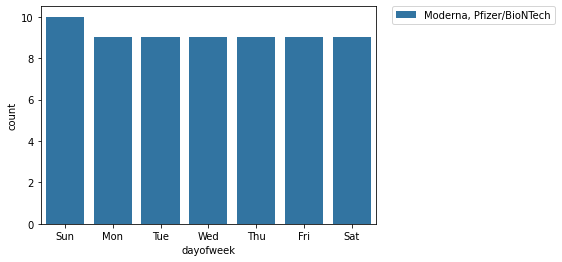

In [30]:
sns.countplot(x = 'dayofweek', data = US, hue = 'vaccines')
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0.)

In [67]:
US.iplot(kind = 'bar', x = 'dayofweek', y = 'daily_vaccinations')

In [ ]:
#People vaccinated per population

In [39]:
per100 = vaccine.groupby('country')['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'].sum()

<ipython-input-39-4ad58800ba4c>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [41]:
per100 = per100.reset_index(level=[0])

In [46]:
per100_10 = per100.nlargest(10, 'people_vaccinated_per_hundred')

In [ ]:
#Plotly

In [9]:
daily_10.iplot(kind = 'bar', x = 'country', y = 'daily_vaccinations')

In [51]:
vaccine[['people_vaccinated', 'people_fully_vaccinated']].iplot(kind = 'spread')

/Users/hyojae/opt/anaconda3/lib/python3.8/site-packages/cufflinks/plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/Users/hyojae/opt/anaconda3/lib/python3.8/site-packages/cufflinks/plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [12]:
vaccine['vaccines'].iplot(kind = 'hist')

In [47]:
per100_10.iplot(kind = 'bar', x = 'country', y = 'people_vaccinated_per_hundred')

In [48]:
per100_10.iplot(kind = 'bar', x = 'country', y = 'people_fully_vaccinated_per_hundred')

In [ ]:
#seaborn

<AxesSubplot:xlabel='country', ylabel='daily_vaccinations'>

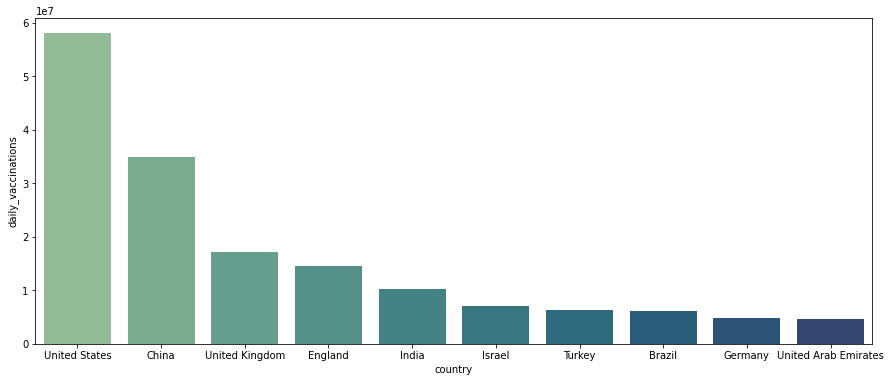

In [17]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'country', y = 'daily_vaccinations', data = daily_10, palette = 'crest')
